### Лабораторная работа №1. Логистическая регрессия в качестве нейронной сети

Данные: В работе предлагается использовать набор данных notMNIST, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (A … J, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.  

Данные можно скачать по ссылке:  
https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz (большой набор данных);  
https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz (маленький набор данных);  
Описание данных на английском языке доступно по ссылке:  
http://yaroslavvb.blogspot.sg/2011/09/notmnist-dataset.html

Задание 1.  
Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

Задание 2.  
Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).

Задание 3.  
Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);

Задание 4.  
Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.

Задание 5.  
Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).

Результат выполнения заданий опишите в отчете.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from util import extract_dataset, download_dataset, read_dataset, split_dataset

In [7]:
dataset_url = "https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz"
dataset_path = extract_dataset(download_dataset(dataset_url))

In [8]:
img_height, img_width = 28, 28
known_classes=["A","B","C","D","E","F","G","H","I","J"]
X, y = read_dataset(dataset_path, known_classes, img_height, img_width)

In [26]:
def show_images(X, y, known_classes, img_height, img_width):
    rand_index = np.random.randint(0, X.shape[1], 16)

    plt.figure(figsize=(10,10))
    for i in range(len(rand_index)):
        img = X[:,rand_index[i]].reshape(img_height,img_width)
        
        plt.subplot(4,4,i+1)
        plt.imshow(img ,cmap=plt.cm.binary)

    plt.show()

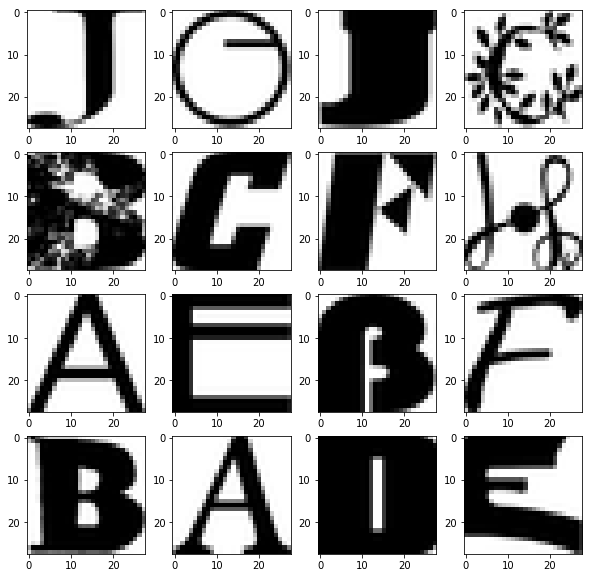

In [27]:
show_images(X, y, known_classes, img_height, img_width)

In [30]:
from collections import Counter
Counter(y[0])

Counter({8: 52912,
         5: 52912,
         0: 52909,
         9: 52911,
         7: 52912,
         1: 52911,
         4: 52912,
         2: 52912,
         3: 52911,
         6: 52912})

In [38]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_dataset(X, y, 200000, 10000, 19000)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [40]:
val_scores, test_scores = [], []
for train_size in [50, 100, 1000, 50000]:
    base_model = LogisticRegression(solver="lbfgs",max_iter=1000)
    model = OneVsRestClassifier(base_model).fit(X_train[:, :train_size].T, Y_train[:, :train_size].T)
    
    val_scores.append(model.score(X_val.T, Y_val.T))
    test_scores.append(model.score(X_test.T, Y_test.T))

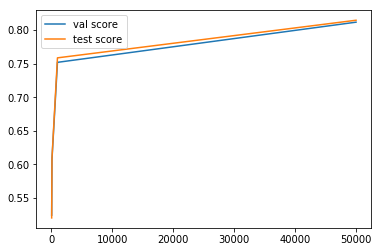

In [42]:
plt.plot([50, 100, 1000, 50000], val_scores, label="val score")
plt.plot([50, 100, 1000, 50000], test_scores, label="test score")
plt.legend()
plt.show()